In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
# the dataset contain the following features

list(data.feature_names)

[np.str_('mean radius'),
 np.str_('mean texture'),
 np.str_('mean perimeter'),
 np.str_('mean area'),
 np.str_('mean smoothness'),
 np.str_('mean compactness'),
 np.str_('mean concavity'),
 np.str_('mean concave points'),
 np.str_('mean symmetry'),
 np.str_('mean fractal dimension'),
 np.str_('radius error'),
 np.str_('texture error'),
 np.str_('perimeter error'),
 np.str_('area error'),
 np.str_('smoothness error'),
 np.str_('compactness error'),
 np.str_('concavity error'),
 np.str_('concave points error'),
 np.str_('symmetry error'),
 np.str_('fractal dimension error'),
 np.str_('worst radius'),
 np.str_('worst texture'),
 np.str_('worst perimeter'),
 np.str_('worst area'),
 np.str_('worst smoothness'),
 np.str_('worst compactness'),
 np.str_('worst concavity'),
 np.str_('worst concave points'),
 np.str_('worst symmetry'),
 np.str_('worst fractal dimension')]

In [5]:
# the dataset contain the following labels

data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
# Getting features and labels 

X = data.data
y = data.target

In [7]:
# the features and labels are numpy array 

type(X)

numpy.ndarray

In [8]:
# To quickly look in data we can get the dataframe from X

data_df = pd.DataFrame(X, columns=data.feature_names)

In [9]:
# Looking from the head 

data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Getting the basic information

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# Getting the basic stats

data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)

In [13]:
print('The number of training samples: {}\nThe number of testing samples: {}'.format(X_train.shape[0], X_test.shape[0]))

The number of training samples: 455
The number of testing samples: 114


In [14]:
# Scaling the features to be between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [15]:
X_test_scaled = scaler.transform(X_test)

In [16]:
# Creating a model 

# Getting the input shape

input_shape = X_train_scaled.shape[1:]

model_1 = tf.keras.models.Sequential([
                                      
              # The first layer has 30 neurons(or units)                    
              tf.keras.layers.Dense(units=30, input_shape=input_shape, activation='relu'),

              # The second layer has 25 neurons 

              tf.keras.layers.Dense(units=15, activation='relu'),

              # The third layer has 1 neuron and activation of sigmoid. 
              # Because of sigmoid, the output of this layer will be a value bwteen 0 and 1
              tf.keras.layers.Dense(1, activation='sigmoid')                     
]) 

# Compiling the model 

model_1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# By setting validation_split=0.15, I am allocating 15% of the dataset to be used for evaluating the model during the training
# Model training returns model history(accuracy, loss, epochs...) 

history = model_1.fit(X_train_scaled, y_train, epochs=60, validation_split=0.15)

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3694 - loss: 0.7044 - val_accuracy: 0.3913 - val_loss: 0.6833
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3780 - loss: 0.6955 - val_accuracy: 0.6087 - val_loss: 0.6677
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5808 - loss: 0.6674 - val_accuracy: 0.7246 - val_loss: 0.6582
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7287 - loss: 0.6627 - val_accuracy: 0.7681 - val_loss: 0.6496
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8058 - loss: 0.6516 - val_accuracy: 0.8261 - val_loss: 0.6405
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8489 - loss: 0.6437 - val_accuracy: 0.8986 - val_loss: 0.6323
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8771 - loss: 0.6313 - val_accuracy: 0.8406 - val_loss: 0.6250
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8974 - loss: 0.6237 - val_accuracy: 0.8986 - val_loss

<Axes: >

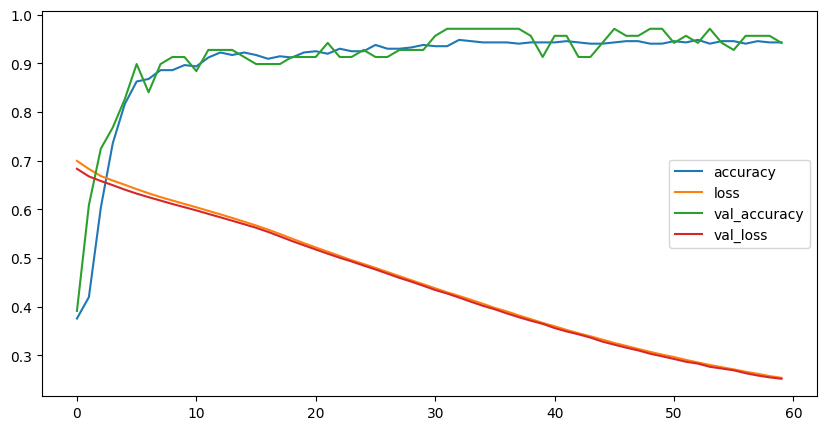

In [18]:
# Getting the dataframe of loss and accuracies on both training and validation

loss_acc_metrics_df = pd.DataFrame(history.history)
loss_acc_metrics_df.plot(figsize=(10,5))

In [19]:
# Evaluating a model on unseen data: test set

model_eval = model_1.evaluate(X_test_scaled, y_test)

# Printing the loss and accuracy 

print('Test loss: {}\nTest accuracy:{}'.format(model_eval[0],model_eval[1]))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9502 - loss: 0.2296 
Test loss: 0.2323784977197647
Test accuracy:0.9561403393745422


In [20]:
# ‼DON'T DO THIS!! X_test is not scaled. The results will be awful

model_1.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3623 - loss: 146.5419 


[143.34486389160156, 0.37719297409057617]

In [21]:
# Getting the prediction

predictions = model_1.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [22]:
predictions[:15]

array([[0.73970646],
       [0.17114219],
       [0.29363805],
       [0.8730591 ],
       [0.89702517],
       [0.01000169],
       [0.02821303],
       [0.40095034],
       [0.4982273 ],
       [0.8252009 ],
       [0.8096538 ],
       [0.39890108],
       [0.8035126 ],
       [0.48322257],
       [0.8202603 ]], dtype=float32)

In [23]:
# Rounding the predictions to 0 and 1

predictions = tf.round(predictions)

In [24]:
 # Display the first 15 preds values 
 
predictions[:15]

<tf.Tensor: shape=(15, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

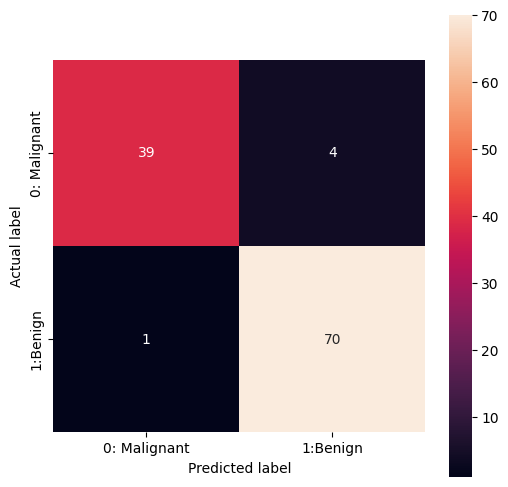

In [25]:
# Getting the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

# Plotting confusion matrix 

plt.figure(figsize=(6,6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0: Malignant', '1:Benign'],
                        yticklabels=['0: Malignant', '1:Benign'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [26]:
# Classification report: F1 score, Recall, Precision

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [27]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(fashion_train, fashion_train_label), (fashion_test, fashion_test_label) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
index = 10

# Get the pixels

fashion_train[index]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [29]:
# A list of label names

class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

This type of fashion is: T-shirt/top(0)


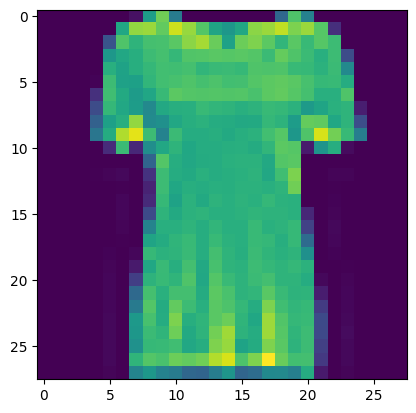

In [30]:
# Show the image

plt.imshow(fashion_train[index])

# Display the label

image_label = fashion_train_label[index]
print('This type of fashion is: {}({})'.format(class_names[image_label], image_label))

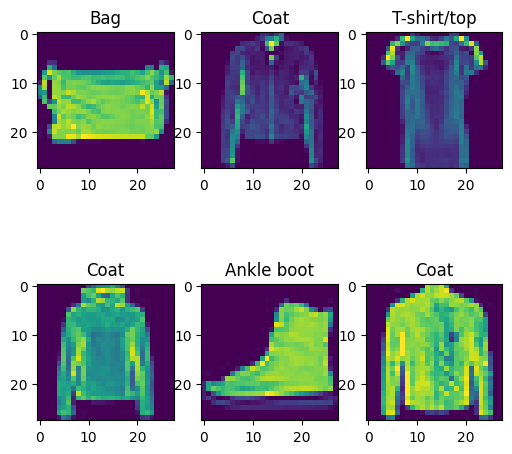

In [31]:
import random

plt.figure(figsize=(6,6))

for index in range(6):

  ax = plt.subplot(2,3, index+1)
  random_index = random.choice(range(len(fashion_train)))
  plt.imshow(fashion_train[random_index])
  plt.title(class_names[fashion_train_label[random_index]])

In [32]:
# Getting the image shape

print('The shape of the whole training dataset:{}'.format(fashion_train[0].shape))
print('The shape of the first(and other)image:{}'.format(fashion_train[0].shape))

The shape of the whole training dataset:(28, 28)
The shape of the first(and other)image:(28, 28)


In [33]:
# Scaling the image pixels to be between 0 and 1

fashion_train = fashion_train/255.0

fashion_test = fashion_test/255.0

In [34]:
# Creating a model

fashion_classifier = tf.keras.models.Sequential([
                                                 
        # Flattening layer will convert array of pixels into one dimensional column array                                        
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(units=64, activation='relu'),
       tf.keras.layers.Dense(units=32, activation='relu'),
       tf.keras.layers.Dense(units=10, activation='softmax')                           

])

# Compiling a model: Specifying a loss and optimization function

fashion_classifier.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy']
                           
)

In [35]:
# Training a model
# Allocating 15% of training data to validation set

fashion_classifier.fit(fashion_train, fashion_train_label, epochs=20, validation_split=0.15)

Epoch 1/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7428 - loss: 0.7211 - val_accuracy: 0.8493 - val_loss: 0.4097
Epoch 2/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8592 - loss: 0.4001 - val_accuracy: 0.8437 - val_loss: 0.4305
Epoch 3/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8673 - loss: 0.3666 - val_accuracy: 0.8728 - val_loss: 0.3589
Epoch 4/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8783 - loss: 0.3360 - val_accuracy: 0.8713 - val_loss: 0.3484
Epoch 5/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8858 - loss: 0.3123 - val_accuracy: 0.8787 - val_loss: 0.3473
Epoch 6/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8900 - loss: 0.3000 - val_accuracy: 0.8669 - val_loss: 0.3720
Epoch 7/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8902 - loss: 0.2981 - val_accuracy: 0.8801 - val_loss: 0.3338
Epoch 8/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8971 - loss: 0.2768 - 

<Axes: >

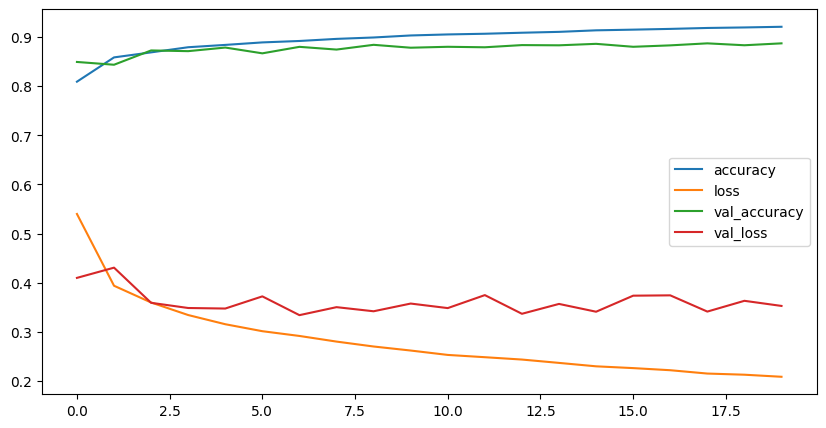

In [36]:
# Getting the dataframe of loss and accuracies on both training and validation

loss_acc_metrics_df = pd.DataFrame(fashion_classifier.history.history)

# Plotting the loss and accuracy

loss_acc_metrics_df.plot(figsize=(10,5))

In [37]:
# Evaluating the model on unseen data

eval = fashion_classifier.evaluate(fashion_test, fashion_test_label)

# Printing the loss and accuracy 

print('Test loss: {}\nTest accuracy:{}'.format(eval[0],eval[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8841 - loss: 0.3587
Test loss: 0.36080339550971985
Test accuracy:0.883899986743927


In [38]:
# Creating a same model as used before

def classifier():

  model = tf.keras.models.Sequential([
                                                 
        # Flattening layer will convert array of pixels into one dimensional column array                                        
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(units=64, activation='relu'),
       tf.keras.layers.Dense(units=32, activation='relu'),
       tf.keras.layers.Dense(units=10, activation='softmax')                           

  ])

# Compiling a model: Specifying a loss and optimization function

  model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy']
                           
  )

  return model

In [39]:
# Defining callbacks 

from keras.callbacks import ModelCheckpoint

callbacks = ModelCheckpoint('fashion_classifier.h5', save_best_only=True)

In [40]:
# Controlling training with callbacks

# Get the model

fashion_classifier_2 = classifier()

fashion_classifier_2.fit(fashion_train, fashion_train_label, epochs=20, validation_split=0.15, callbacks=[callbacks])

Epoch 1/20
1590/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7557 - loss: 0.6828

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7558 - loss: 0.6823 - val_accuracy: 0.8302 - val_loss: 0.4548
Epoch 2/20
1577/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8537 - loss: 0.4033

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8538 - loss: 0.4031 - val_accuracy: 0.8681 - val_loss: 0.3768
Epoch 3/20
1587/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8702 - loss: 0.3551

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8702 - loss: 0.3551 - val_accuracy: 0.8671 - val_loss: 0.3734
Epoch 4/20
1586/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8806 - loss: 0.3255

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8806 - loss: 0.3255 - val_accuracy: 0.8771 - val_loss: 0.3385
Epoch 5/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8848 - loss: 0.3102 - val_accuracy: 0.8760 - val_loss: 0.3430
Epoch 6/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8881 - loss: 0.3004 - val_accuracy: 0.8689 - val_loss: 0.3779
Epoch 7/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8961 - loss: 0.2826 - val_accuracy: 0.8746 - val_loss: 0.3436
Epoch 8/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8989 - loss: 0.2761 - val_accuracy: 0.8807 - val_loss: 0.3450
Epoch 9/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9005 - loss: 0.2648 - val_accuracy: 0.8748 - val_loss: 0.3507
Epoch 10/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9032 - loss: 0.2558 - val_accuracy: 0.8798 - val_loss: 0.3387
Epoch 11/20
1577/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9054 - loss: 0.2533

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9054 - loss: 0.2533 - val_accuracy: 0.8824 - val_loss: 0.3282
Epoch 12/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9104 - loss: 0.2388 - val_accuracy: 0.8810 - val_loss: 0.3391
Epoch 13/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9108 - loss: 0.2362 - val_accuracy: 0.8830 - val_loss: 0.3509
Epoch 14/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9150 - loss: 0.2282 - val_accuracy: 0.8850 - val_loss: 0.3381
Epoch 15/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9144 - loss: 0.2279 - val_accuracy: 0.8849 - val_loss: 0.3388
Epoch 16/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9191 - loss: 0.2154 - val_accuracy: 0.8851 - val_loss: 0.3512
Epoch 17/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9214 - loss: 0.2086 - val_accuracy: 0.8819 - val_loss: 0.3662
Epoch 18/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9220 - loss: 0.2070 - val_

In [41]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

In [42]:
# Stopping training early

# Getting the model

fashion_classifier_2 = classifier()

history = fashion_classifier_2.fit(fashion_train, fashion_train_label, epochs=100, validation_split=0.15, callbacks=[early_stop])

Epoch 1/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7507 - loss: 0.7197 - val_accuracy: 0.8436 - val_loss: 0.4513
Epoch 2/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8606 - loss: 0.3921 - val_accuracy: 0.8481 - val_loss: 0.4150
Epoch 3/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8718 - loss: 0.3504 - val_accuracy: 0.8661 - val_loss: 0.3863
Epoch 4/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8788 - loss: 0.3253 - val_accuracy: 0.8750 - val_loss: 0.3497
Epoch 5/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8845 - loss: 0.3120 - val_accuracy: 0.8732 - val_loss: 0.3551
Epoch 6/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8886 - loss: 0.2962 - val_accuracy: 0.8740 - val_loss: 0.3451
Epoch 7/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8933 - loss: 0.2835 - val_accuracy: 0.8822 - val_loss: 0.3384
Epoch 8/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8988 - loss: 0

In [43]:
# Combining Early stopping and Model Check point

# Getting the model 

fashion_classifier_2 = classifier()

history = fashion_classifier_2.fit(fashion_train, fashion_train_label, epochs=100, validation_split=0.15, callbacks=[callbacks, early_stop])

Epoch 1/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7510 - loss: 0.7132 - val_accuracy: 0.8542 - val_loss: 0.4135
Epoch 2/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8582 - loss: 0.3947 - val_accuracy: 0.8586 - val_loss: 0.3952
Epoch 3/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8707 - loss: 0.3597 - val_accuracy: 0.8677 - val_loss: 0.3674
Epoch 4/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8795 - loss: 0.3308 - val_accuracy: 0.8779 - val_loss: 0.3414
Epoch 5/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8868 - loss: 0.3095 - val_accuracy: 0.8779 - val_loss: 0.3509
Epoch 6/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8903 - loss: 0.2962 - val_accuracy: 0.8806 - val_loss: 0.3343
Epoch 7/100
1582/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8954 - loss: 0.2800

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8954 - loss: 0.2800 - val_accuracy: 0.8833 - val_loss: 0.3203
Epoch 8/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8996 - loss: 0.2738 - val_accuracy: 0.8762 - val_loss: 0.3451
Epoch 9/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9029 - loss: 0.2624 - val_accuracy: 0.8837 - val_loss: 0.3285
Epoch 10/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9052 - loss: 0.2549 - val_accuracy: 0.8853 - val_loss: 0.3299
Epoch 11/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9104 - loss: 0.2432 - val_accuracy: 0.8822 - val_loss: 0.3364
Epoch 12/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9096 - loss: 0.2416 - val_accuracy: 0.8850 - val_loss: 0.3344
Epoch 13/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9133 - loss: 0.2312 - val_accuracy: 0.8890 - val_loss: 0.3213
Epoch 14/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9128 - loss: 0.2334 -

In [44]:
# Custom callbacks

class callback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):

    if (logs.get('accuracy') > 0.95):

      print('\n Training is cancelled at an accuracy of 95%')
      self.model.stop_training = True


# Call callbacks

custom_callback = callback()

In [45]:
# Implementing custom ballback

# Getting the model 

fashion_classifier_2 = classifier()

history = fashion_classifier_2.fit(fashion_train, fashion_train_label, epochs=100, validation_split=0.15, callbacks=[custom_callback])

Epoch 1/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7531 - loss: 0.7234 - val_accuracy: 0.8512 - val_loss: 0.4233
Epoch 2/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8561 - loss: 0.4003 - val_accuracy: 0.8633 - val_loss: 0.3782
Epoch 3/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8667 - loss: 0.3666 - val_accuracy: 0.8692 - val_loss: 0.3687
Epoch 4/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8763 - loss: 0.3376 - val_accuracy: 0.8743 - val_loss: 0.3563
Epoch 5/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8860 - loss: 0.3146 - val_accuracy: 0.8766 - val_loss: 0.3458
Epoch 6/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8889 - loss: 0.3035 - val_accuracy: 0.8803 - val_loss: 0.3398
Epoch 7/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8944 - loss: 0.2835 - val_accuracy: 0.8792 - val_loss: 0.3431
Epoch 8/100
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8971 - loss: 0

In [46]:
# Load the Tensorboard notebook extension
# And import datetime

%load_ext tensorboard

In [47]:
!rm -rf ./logs/

In [48]:
# Getting the model 

fashion_classifier = classifier()

In [49]:
# Create a callback

tfboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [50]:
fashion_classifier.fit(fashion_train, fashion_train_label, epochs=20, validation_split=0.15, callbacks=[tfboard_callback])

Epoch 1/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7513 - loss: 0.7304 - val_accuracy: 0.8404 - val_loss: 0.4599
Epoch 2/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8549 - loss: 0.4114 - val_accuracy: 0.8627 - val_loss: 0.3873
Epoch 3/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8660 - loss: 0.3684 - val_accuracy: 0.8709 - val_loss: 0.3587
Epoch 4/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8816 - loss: 0.3305 - val_accuracy: 0.8660 - val_loss: 0.3679
Epoch 5/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8834 - loss: 0.3176 - val_accuracy: 0.8734 - val_loss: 0.3430
Epoch 6/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8916 - loss: 0.2976 - val_accuracy: 0.8750 - val_loss: 0.3540
Epoch 7/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8920 - loss: 0.2915 - val_accuracy: 0.8826 - val_loss: 0.3349
Epoch 8/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8984 - loss: 0.2750 -

In [51]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>